<a href="https://colab.research.google.com/github/hub420/PyTorchTutorial/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
# Create a model class that inherits module
# usamos oop
class Model(nn.Module):
  #input layer (4 features of the flower) -->
  #Hidden layer1 (number of neurons) -->
  #H2(N) -->
  #output (3 classes of iris flowers)
  def __init__(self, input_features=4, h1=8, h2=9, output_featuares=3):
    super().__init__() #instancia el modulo nn
    self.fc1 = nn.Linear(input_features, h1) # fc fully conected
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, output_featuares)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [8]:
# Pick a manual seed for randomization
torch.manual_seed(9)
# create instance of model
model = Model()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#cargar la base de datos
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
#llamo a la base de datos
my_df

In [ ]:
#cambiar columna de strings a numeros de la BD
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

In [13]:
#Train test split  Set X, y  Osea elimina la columna
X = my_df.drop('variety', axis = 1)
y = my_df['variety']

In [14]:
#convert these to numpy arrays
X = X.values
y = y.values

In [ ]:
#desplegar el numpy array
X,y

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [18]:
#Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [19]:
#Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [20]:
# set the criterion of model to mesure the error, how far off the predictions are from.
criterion = nn.CrossEntropyLoss()
# choose adam optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs),lower our learnig rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# para ver los modelos
model.parameters

In [ ]:
#Train our model
#Epochs = one run thru all the training data in our network
epochs = 100
#keep track of the errors
losses = []
for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(X_train) # get predicted results

  # Messeru the errors/loss gonna be high at first
  loss = criterion(y_pred, y_train) #predicted values vrs the y_train

  #keep track of our losses
  losses.append(loss.detach(). numpy())

  #print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  #back propagation= take the error rate of forward propagation
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Text(0.5, 0, 'Epoch')

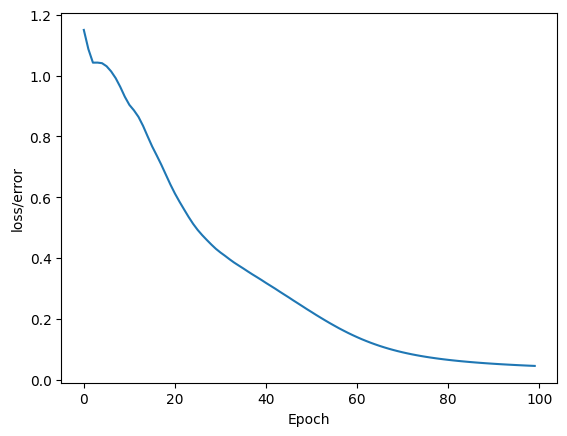

In [25]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel( 'Epoch')